In [1]:
format long
addpath('~/Desktop/MATLAB-Online-master/plotly')
getplotlyoffline('http://cdn.plot.ly/plotly-latest.min.js')


Success! You can generate your first offline graph
using the 'offline' flag of fig2plotly as follows:

>> plot(1:10); fig2plotly(gcf, 'offline', true);



In [4]:
%make some waves
% Amplitude * cos(2 * pi * frequency * (time + phase))
t = 0:.00001:.3;
r = 1 * cos(2 * pi * 10 * t + 0);

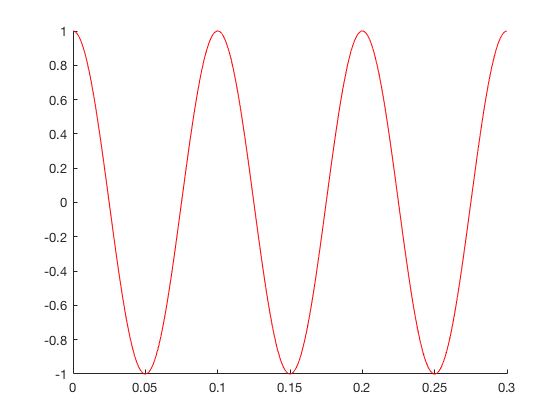

In [5]:
[fh,ah] = makefigure();
lh = line(t,r,'color','r');


plotly_url =

file:///Users/tuckerfisher/Dropbox/computation_preschool/cn_preschool/cbb_jnotebooks/m1_dtft/untitled.html



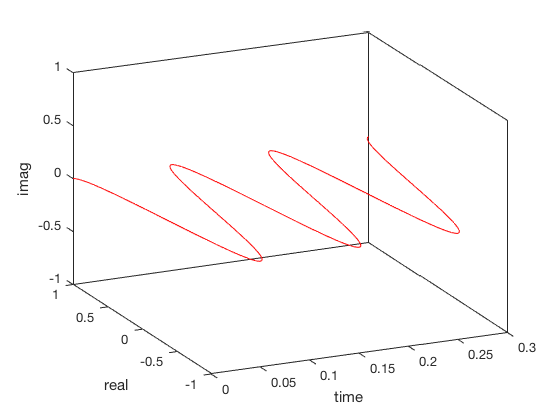

In [7]:
%%make some complex cos waves
% amp * exp(-1j * 2 * pi * freq * (t + phase))
% real() = -sin() ESHED -- not sure why he calls this a sin wave it is
                  %        the equation for -sin in the real....
% imag() = cos()
b = 1 * exp(-1j * 2 * pi * 10 * t);
[fh,ah] = makefigure();
plot(t,r,'color','r');
%hold on
%plot3(t,real(b),imag(b),'color', 'b');
%hold off
p = fig2plotly(fh,'offline',true);
plotly_url = p.url
xlabel('time')
ylabel('real')
zlabel('imag')
view(-25,25)


In [106]:
pi


ans =

   3.141592653589793



In [107]:
plotlysetup()




plotly:wrongInput

Whoops! Wrong number of inputs. Please run >> help plotlysetup 
for more information regarding the setup your Plotly API MATLAB 
Library. Please contact chuck@plot.ly for more information.



In [108]:
a = 5


a =

     5

